# WEEK 1

Below are the attempted solutions of week 1 graded assignments



## Q1
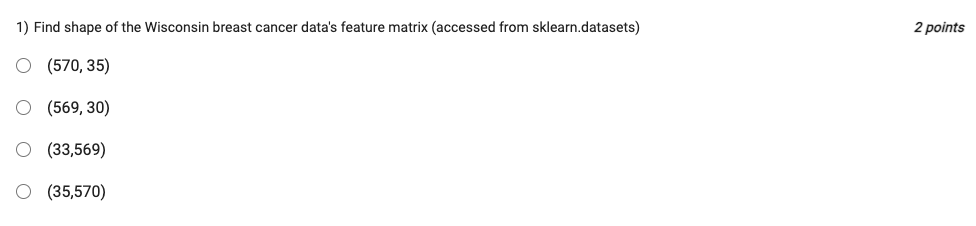

In [4]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [11]:
df = load_breast_cancer(as_frame=False)

In [71]:
print(df.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [114]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [108]:
X = pd.DataFrame(df['data'], columns=df['feature_names'])

In [109]:
X.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [110]:
y = pd.DataFrame(df['target'], columns=['cancer'], )

In [111]:
X.shape

(569, 30)

## Q2, Q3
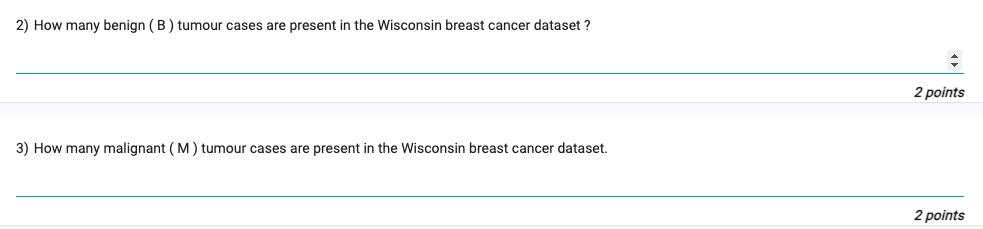

In [126]:
df.target_names

# The order is important here, 0 means malignant, 1 means benign

array(['malignant', 'benign'], dtype='<U9')

In [124]:
y[y.cancer == 0].count().sum() # Malignant

212

In [125]:
y[y.cancer == 1].count().sum() # Benign

357

In [63]:
y.value_counts()

cancer
1         357
0         212
dtype: int64

## Q4
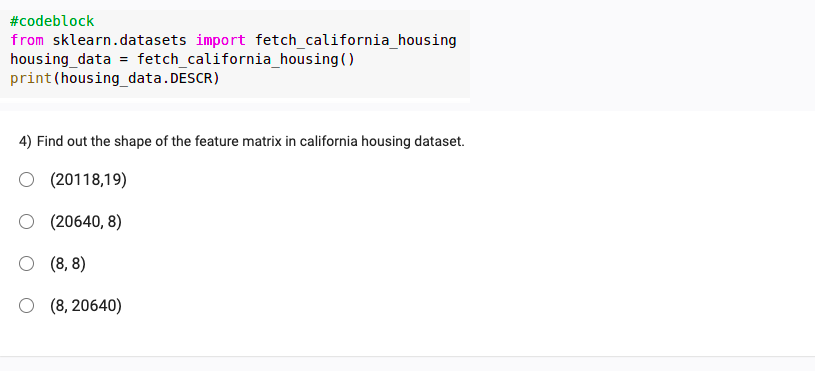

In [67]:
from sklearn.datasets import fetch_california_housing

housing_data = fetch_california_housing()

In [68]:
print(housing_data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [80]:
X = pd.DataFrame(housing_data['data'], columns=housing_data['feature_names'])
y = pd.DataFrame(housing_data['target'], columns=['MedHouseVal'] )

In [98]:
X.shape

(20640, 8)

In [105]:
(y.head(5))

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [ ]:
[4.526, 3.585 ,3.521 ,3.413 ,3.422]

# WEEK 2
Below are the attempted solutions of week 2 graded assignments

## Q1

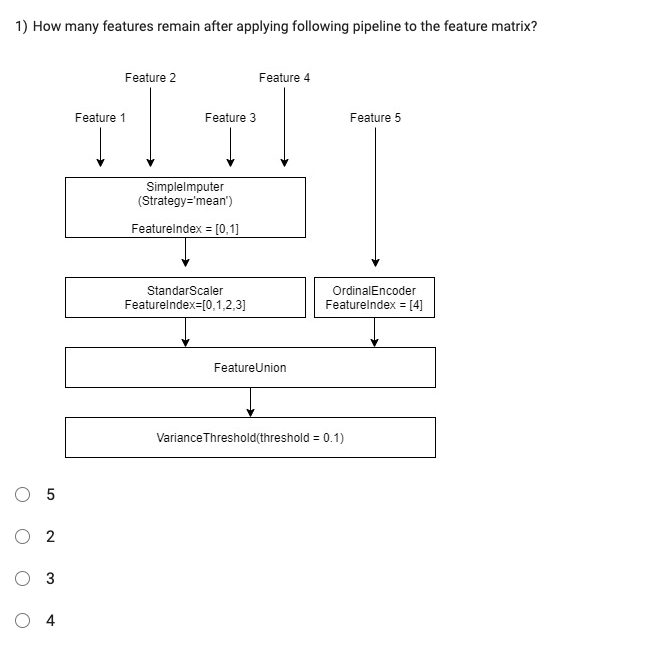

In [1]:
import pandas as pd
import numpy as np


In [2]:
!ls

Graded_Assignments.ipynb mlp PA GA                w2.2_data.csv
Qz1_revision.ipynb       w2.1_data.csv            w2_data.csv


In [3]:
df = pd.read_csv("w2_data.csv")

In [4]:
df.head()

,V1,V2,V3,V4,V5,Target
0,2.0,50.0,12500.0,98.0,NEGATIVE,YES
1,0.0,13.0,3250.0,28.0,NEGATIVE,YES
2,?,?,4000.0,35.0,NEGATIVE,YES
3,?,20.0,5000.0,45.0,NEGATIVE,YES
4,1.0,24.0,6000.0,77.0,NEGATIVE,NO


In [5]:
X = df.iloc[:,0:5].copy()
y = df.iloc[:,-1].copy()

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder)
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.feature_selection import VarianceThreshold


In [16]:
numerical_pipe = ColumnTransformer(transformers=[('impute', SimpleImputer(strategy = 'mean'), slice(0,4))])
scale_pipe = Pipeline(steps=[('numeric', numerical_pipe),
                             ('scale', StandardScaler())])

categorical_pipe = ColumnTransformer(transformers = [('cat', OrdinalEncoder(), [4])])
complete_pipe = FeatureUnion([('numeric', scale_pipe), ('cat', categorical_pipe)])
pipe = Pipeline(steps =[('cp',complete_pipe),
                         ('varianceThreshold', VarianceThreshold(threshold =0.1))])
                                     
# pipe.fit_transform(X).shape

In [28]:
pipe.fit_transform(X).shape

(748, 4)

In [11]:
pipe

Pipeline(steps=[('cp',
                 FeatureUnion(transformer_list=[('numeric',
                                                 Pipeline(steps=[('numeric',
                                                                  ColumnTransformer(transformers=[('impute',
                                                                                                   SimpleImputer(),
                                                                                                   slice(0, 4, None))])),
                                                                 ('scale',
                                                                  StandardScaler())])),
                                                ('cat',
                                                 ColumnTransformer(transformers=[('cat',
                                                                                  OrdinalEncoder(),
                                                                                  [4])]))])),
                ('varianceThreshold', VarianceThreshold(threshold=0.1))])

In [14]:
# Creating a numerical pipeline. Used ColumnTransformer to apply to specific column indices
num_pipe = Pipeline([
    ('simpleImputerColTrans', ColumnTransformer([
        ('simpleImputer', SimpleImputer(strategy='mean'), [0,1,2,3])
    ])),
    ('StandardScalerColTrans', ColumnTransformer([
        ('StandardScaler', StandardScaler(), slice(0,4))
    ]))
])

# Creating a categorical pipeline. Used ColumnTransformer to apply to specific column indices
cat_pipe = Pipeline([
    ('ordinalEncoderColTrans', ColumnTransformer([
        ('ordinalEncoder', OrdinalEncoder(), [4])
    ]))
])

# Merging both the pipelines together using FeatureUnion

merged_pipeline = FeatureUnion(transformer_list=[
    ('num_pipe', num_pipe),
    ('cat_pipe', cat_pipe)
])

full_pipeline = Pipeline([
    ('merged_pipe', merged_pipeline),
    ('varianceThreshold', VarianceThreshold(threshold=0.1))
])


In [15]:
X.replace("?", np.nan, inplace=True)

In [778]:
pipe.fit_transform(X).shape

(748, 2)

In [779]:
full_pipeline

Pipeline(steps=[('merged_pipe',
                 FeatureUnion(transformer_list=[('num_pipe',
                                                 Pipeline(steps=[('simpleImputerColTrans',
                                                                  ColumnTransformer(transformers=[('simpleImputer',
                                                                                                   SimpleImputer(),
                                                                                                   [0,
                                                                                                    1,
                                                                                                    2,
                                                                                                    3])])),
                                                                 ('StandardScalerColTrans',
                                                                  ColumnTransformer(transformers=[('StandardScaler',
                                                                                                   StandardScaler(),
                                                                                                   slice(0, 4, None))]))])),
                                                ('cat_pipe',
                                                 Pipeline(steps=[('ordinalEncoderColTrans',
                                                                  ColumnTransformer(transformers=[('ordinalEncoder',
                                                                                                   OrdinalEncoder(),
                                                                                                   [4])]))]))])),
                ('varianceThreshold', VarianceThreshold(threshold=0.1))])

In [780]:
X.replace("?", np.nan, inplace=True)

In [781]:
X_dash = full_pipeline.fit_transform(X)

In [784]:
pd.DataFrame(X_dash, columns=X.columns[:-1])

,V1,V2,V3,V4
0,-0.938169,7.709867e+00,7.623346,2.615633
1,-1.186278,1.304549e+00,1.282738,-0.257881
2,0.000000,-1.537585e-16,1.796842,0.029471
3,0.000000,2.516366e+00,2.482313,0.439973
4,-1.062223,3.208833e+00,3.167784,1.753579
...,...,...,...,...
743,1.666966,-5.997340e-01,-0.602307,0.152621
744,1.418858,-5.997340e-01,-0.602307,0.727324
745,1.666966,-4.266173e-01,-0.430940,1.137826
746,3.651831,-7.728506e-01,-0.773675,0.193671


In [785]:
X_dash.shape

(748, 4)

### Answer : 4

## Q2

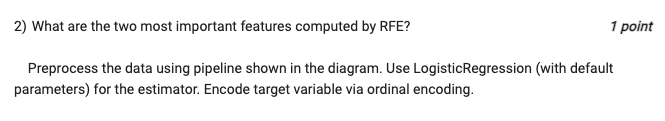

In [786]:
merged_pipeline

FeatureUnion(transformer_list=[('num_pipe',
                                Pipeline(steps=[('simpleImputerColTrans',
                                                 ColumnTransformer(transformers=[('simpleImputer',
                                                                                  SimpleImputer(),
                                                                                  [0,
                                                                                   1,
                                                                                   2,
                                                                                   3])])),
                                                ('StandardScalerColTrans',
                                                 ColumnTransformer(transformers=[('StandardScaler',
                                                                                  StandardScaler(),
                                                                                  slice(0, 4, None))]))])),
                               ('cat_pipe',
                                Pipeline(steps=[('ordinalEncoderColTrans',
                                                 ColumnTransformer(transformers=[('ordinalEncoder',
                                                                                  OrdinalEncoder(),
                                                                                  [4])]))]))])

In [787]:
X_dash = merged_pipeline.fit_transform(X)

In [788]:
X_dash = pd.DataFrame(X_dash)

In [790]:
X.head(5)

,V1,V2,V3,V4,V5
0,2.0,50.0,12500.0,98.0,NEGATIVE
1,0.0,13.0,3250.0,28.0,NEGATIVE
2,NaN,NaN,4000.0,35.0,NEGATIVE
3,NaN,20.0,5000.0,45.0,NEGATIVE
4,1.0,24.0,6000.0,77.0,NEGATIVE


In [791]:
oe = OrdinalEncoder()

In [792]:
y_dash = (oe.fit_transform(np.array(y).reshape(-1,1))).ravel()

In [793]:
y_dash.shape

(748,)

In [794]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe = RFE(LogisticRegression(), n_features_to_select=2)

In [806]:
X_features = rfe.fit_transform(X_dash, y=y_dash)

In [807]:
rfe.support_

array([ True, False,  True, False, False])

In [808]:
X_features = pd.DataFrame(X_features, columns=["V1", "V3"])

In [809]:
X_features

,V1,V3
0,-0.938169,7.623346
1,-1.186278,1.282738
2,0.000000,1.796842
3,0.000000,2.482313
4,-1.062223,3.167784
...,...,...
743,1.666966,-0.602307
744,1.418858,-0.602307
745,1.666966,-0.430940
746,3.651831,-0.773675


### ANS: V1, V3

## Q3, Q4

In [828]:
merged_pipeline

FeatureUnion(transformer_list=[('num_pipe',
                                Pipeline(steps=[('simpleImputerColTrans',
                                                 ColumnTransformer(transformers=[('simpleImputer',
                                                                                  SimpleImputer(),
                                                                                  [0,
                                                                                   1,
                                                                                   2,
                                                                                   3])])),
                                                ('StandardScalerColTrans',
                                                 ColumnTransformer(transformers=[('StandardScaler',
                                                                                  StandardScaler(),
                                                                                  slice(0, 4, None))]))])),
                               ('cat_pipe',
                                Pipeline(steps=[('ordinalEncoderColTrans',
                                                 ColumnTransformer(transformers=[('ordinalEncoder',
                                                                                  OrdinalEncoder(),
                                                                                  [4])]))]))])

In [829]:
temp_x = num_pipe.fit_transform(X)

In [830]:
X_dash = pd.DataFrame(merged_pipeline.fit_transform(X))
y_dash = (oe.fit_transform(np.array(y).reshape(-1,1))).ravel()

In [833]:
from sklearn.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(LogisticRegression(), 
                                n_features_to_select=2, 
                                direction='forward')



In [837]:
sfs.fit(X_dash, y_dash)

SequentialFeatureSelector(estimator=LogisticRegression(),
                          n_features_to_select=2)

In [839]:
sfs.support_

array([False,  True, False,  True, False])

In [841]:
from sklearn.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(LogisticRegression(), 
                                n_features_to_select=2, 
                                direction='backward')

sfs.fit(X_dash, y_dash)

SequentialFeatureSelector(direction='backward', estimator=LogisticRegression(),
                          n_features_to_select=2)

In [842]:
sfs.support_

array([False, False,  True,  True, False])

In [816]:
X_dash.head(2)

,0,1,2,3,4
0,-0.938169,7.709867,7.623346,2.615633,0.0
1,-1.186278,1.304549,1.282738,-0.257881,0.0


temp_x = SimpleImputer(strategy='mean').fit_transform(np.array(X.iloc[:,3]).reshape(-1,1)).ravel()

(temp_x-np.mean(temp_x))/np.std(temp_x)

In [817]:
pd.DataFrame(sfs.fit_transform(X_dash, y_dash))

,0,1
0,7.709867e+00,2.615633
1,1.304549e+00,-0.257881
2,-1.537585e-16,0.029471
3,2.516366e+00,0.439973
4,3.208833e+00,1.753579
...,...,...
743,-5.997340e-01,0.152621
744,-5.997340e-01,0.727324
745,-4.266173e-01,1.137826
746,-7.728506e-01,0.193671


# WEEK 2.1
Below are the attempted solutions of week 2.1 graded assignments

In [486]:
!ls

Graded_Assignments.ipynb w2.1_data.csv
mlp PA GA                w2_data.csv


In [615]:
df = pd.read_csv("w2.1_data.csv")

In [495]:
df.head(5)

,Date,Year,Locality,Estimated Value,Sale Price,Property,Residential,num_rooms,num_bathrooms,carpet_area,property_tax_rate,Face
0,2009-01-02,2009,Waterbury,111440.0,185000.0,Single Family,Detached House,3,3,996.0,1.025953,South
1,2009-01-02,2009,Bridgeport,124670.0,150000.0,Two Family,Duplex,4,3,1241.0,1.025953,South
2,2009-01-02,2009,Waterbury,55720.0,140000.0,Single Family,Detached House,3,2,910.0,1.025953,South
3,2009-01-02,2009,Bridgeport,4775276.0,272900.0,Single Family,Detached House,3,1,971.0,1.025953,East
4,2009-01-02,2009,Bridgeport,112351.0,210000.0,?,Detached House,3,2,1092.0,1.025953,East


In [490]:
df.shape

(10000, 12)

In [548]:
df_test = pd.DataFrame((df=="?").value_counts())

In [589]:
(df=="?").sum().sum()

1823

In [550]:
df_test

0
Date  Year  Locality Estimated Value Sale Price Property Residential num_rooms num_bathrooms carpet_area property_tax_rate Face       
False False False    False           False      False    False       False     False         False       False             False  8177
                                                True     False       False     False         False       False             False  1823

In [552]:
df.shape

(10000, 12)

In [553]:
df.iloc[692, 0]

'2009-11-16'

In [555]:
df.iloc[546,7]

3

In [556]:
df.columns

Index(['Date', 'Year', 'Locality', 'Estimated Value', 'Sale Price', 'Property',
       'Residential', 'num_rooms', 'num_bathrooms', 'carpet_area',
       'property_tax_rate', 'Face'],
      dtype='object')

In [590]:
f_list = df.Locality.unique().tolist()


In [596]:
print(f_list)

['Bridgeport', 'Fairfield', 'Greenwich', 'Norwalk', 'Stamford', 'Waterbury', 'West Hartford']


In [597]:
df.replace("?", np.nan, inplace=True)

In [599]:
df.isnull().sum()

Date                    0
Year                    0
Locality             1253
Estimated Value      1243
Sale Price              0
Property             1823
Residential             0
num_rooms               0
num_bathrooms           0
carpet_area          1229
property_tax_rate       0
Face                    0
dtype: int64

In [639]:
df = pd.read_csv("w2.1_data.csv")


22

In [657]:
(df.isna().sum(axis=1) > 2).sum()

22

In [660]:
df_cleaned = df[df.isna().sum(axis=1) <= 2]

df_cleaned.shape

(9978, 12)

In [651]:
df.iloc[9998,3] = np.nan

In [627]:
df.tail(5)

,Date,Year,Locality,Estimated Value,Sale Price,Property,Residential,num_rooms,num_bathrooms,carpet_area,property_tax_rate,Face
9995,2022-09-30,2022,Bridgeport,153660.0,322000.0,?,Detached House,3,3,917.0,1.003979,North
9996,2022-09-30,2022,Bridgeport,109820.0,340000.0,?,Duplex,4,4,1416.0,1.003979,North
9997,2022-09-30,2022,Waterbury,83210.0,170000.0,Single Family,Detached House,3,1,964.0,1.003979,South
9998,2022-09-30,2022,NaN,NaN,415000.0,Single Family,Detached House,3,3,1014.0,1.003979,North
9999,2022-09-30,2022,Norwalk,154920.0,196000.0,Single Family,Detached House,3,1,932.0,1.003979,East


# WEEK 2.2
Below are the attempted solutions of week 2.2 graded assignments

In [661]:
df = pd.read_csv("./w2.2_data.csv")

In [662]:
df.shape[0]

10000

In [672]:
df_even = df.iloc[[i for i in range(0,df.shape[0], 2)],:]

In [673]:
df_even.iloc[0,3]

111440.0

In [684]:
df_even.iloc[332, 3]

256200.0

In [685]:
df_odd = df.iloc[[i for i in range(1,df.shape[0], 2)],:]

In [688]:
df_odd.iloc[332,3]

352940.0

In [689]:
df_odd.iloc[100, 5]

'Single Family'

In [690]:
df_all_even = df.iloc[[i for i in range(0,df.shape[0], 2)],[i for i in range(0,df.shape[1], 2)]]

In [693]:
df.head(1)

,Date,Year,Locality,Estimated Value,Sale Price,Property,Residential,num_rooms,num_bathrooms,carpet_area,property_tax_rate,Face
0,2009-01-02,2009,Waterbury,111440.0,185000.0,Single Family,Detached House,3,3,996.0,1.025953,South


In [694]:
df_all_even.head(5)

,Date,Locality,Sale Price,Residential,num_bathrooms,property_tax_rate
0,2009-01-02,Waterbury,185000.0,Detached House,3,1.025953
2,2009-01-02,Waterbury,140000.0,Detached House,2,1.025953
4,2009-01-02,Bridgeport,210000.0,Detached House,2,1.025953
6,2009-01-02,Norwalk,1000000.0,Detached House,2,1.025953
8,2009-01-02,NaN,1680000.0,Detached House,1,1.025953


In [695]:
df_all_even.iloc[255,3]

'Detached House'

In [704]:
df.groupby(df['Year']).size()[[2017,2018,2019,2020,2021,2022]].sum()

4749

In [711]:
df_q7 = df[(df['num_rooms'] == 3) & (df['num_bathrooms'] == 3)]


In [714]:
df_q7.shape

(2730, 12)

In [715]:
df_q8 = df[(df['num_rooms'] == 3) | (df['num_bathrooms'] == 3)]


In [717]:
df_q8.head(3)

,Date,Year,Locality,Estimated Value,Sale Price,Property,Residential,num_rooms,num_bathrooms,carpet_area,property_tax_rate,Face
0,2009-01-02,2009,Waterbury,111440.0,185000.0,Single Family,Detached House,3,3,996.0,1.025953,South
1,2009-01-02,2009,Bridgeport,124670.0,150000.0,Two Family,Duplex,4,3,1241.0,1.025953,South
2,2009-01-02,2009,Waterbury,55720.0,140000.0,Single Family,Detached House,3,2,910.0,1.025953,South


In [718]:
df_q8.shape

(8591, 12)

In [726]:
df_q9 = df[(df.Year == 2022) & 
           (df.Locality == 'Greenwich') & 
           (df.num_rooms == 3) & 
           ((df.Face == 'North') | (df.Face=='East'))]



In [730]:
df_q9.head(4)

,Date,Year,Locality,Estimated Value,Sale Price,Property,Residential,num_rooms,num_bathrooms,carpet_area,property_tax_rate,Face
9225,2022-01-09,2022,Greenwich,1613360.0,2750000.0,Single Family,Detached House,3,3,1034.0,1.003979,East
9243,2022-01-16,2022,Greenwich,3179330.0,3800000.0,?,Detached House,3,1,1012.0,1.003979,North
9244,2022-01-16,2022,Greenwich,NaN,950000.0,Single Family,Detached House,3,1,968.0,1.003979,East
9267,2022-01-28,2022,Greenwich,NaN,3600000.0,?,Detached House,3,2,972.0,1.003979,East


In [736]:
august_df = df[df['Date'].str.contains("-08-")]


In [738]:
august_df.shape

(1050, 12)

In [739]:
len(august_df)

1050

In [758]:
(df.groupby(df.Locality).mean())['Sale Price'].sort_values(ascending=False)

Locality
Greenwich        2.270224e+06
Fairfield        7.277225e+05
Stamford         6.305313e+05
Norwalk          5.590959e+05
West Hartford    3.385472e+05
Bridgeport       1.740953e+05
Waterbury        1.062152e+05
Name: Sale Price, dtype: float64

# WEEK 3
Below are the attempted solutions of week 3 graded assignments

In [848]:
from sklearn.datasets import fetch_california_housing

X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [855]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    shuffle=False, 
                                                    test_size=0.2,
                                                    random_state=0)

In [856]:
X_train.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22


In [857]:
X_test.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
16512,2.6368,34.0,5.769022,1.051630,1310.0,3.559783,37.72,-121.22
16513,3.6378,17.0,5.432075,1.022642,1802.0,3.400000,37.81,-121.22


## Q1

In [867]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

In [858]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline


pipe = Pipeline([
    ("std_scaler", StandardScaler()),
    ("LR", LinearRegression())
])




In [859]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()), ('LR', LinearRegression())])

In [863]:
pipe.score(X_test, y_test)

0.6605140591531993

In [865]:
from sklearn.metrics import r2_score

y_predicted = pipe.predict(X_test)
r2_score(y_test, y_predicted)

0.6605140591531993

## Q2

In [872]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_true=y_test, y_pred=y_predicted)

rmse = np.sqrt(mse)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MSE: 0.4946848356388074
RMSE: 0.7033383507521876


## Q3

In [870]:
from sklearn.metrics import explained_variance_score

explained_var = explained_variance_score(y_true=y_test, y_pred=y_predicted)

print(explained_var)

0.6605500501742703


## Q4

In [871]:
from sklearn.metrics import max_error

maximum_error = max_error(y_true=y_test, y_pred=y_predicted)

print(maximum_error)

7.260453292958356


## Q5

In [873]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_true=y_test, y_pred=y_predicted)

print(f"MAE: {mae}")

MAE: 0.5168526993787042


## Q6

In [882]:
print(f"MSE: {mse:.3f}")

MSE: 0.495


In [884]:
from sklearn.linear_model import SGDRegressor

pipe_sgd = Pipeline([
    ("std_scaler", StandardScaler()),
    ("sgd", SGDRegressor(random_state=0))
])

In [895]:
pipe_sgd.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('sgd', SGDRegressor(random_state=0))])

In [887]:
pipe_sgd.score(X_test, y_test)

0.6647196952006458

## Q7

In [891]:
pipe_sgd['sgd'].intercept_

array([2.01123921])

In [905]:
for i in (pipe_sgd['sgd'].coef_):
    print(round(i, 4))


0.8405
0.1123
-0.4121
0.216
-0.0178
-0.0148
-0.8739
-0.8391


In [902]:
for i in [ 0.8404, 0.1123 , -0.4121, 0.2159, -0.0178,-0.01480, -0.8739, -0.8391]:
    print(i)

0.8404
0.1123
-0.4121
0.2159
-0.0178
-0.0148
-0.8739
-0.8391


# WEEK 4

## Q1
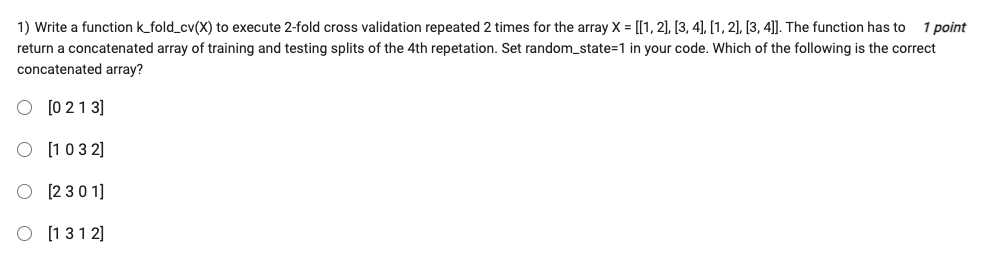

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import (RepeatedKFold, KFold)

In [2]:
X = [
    [1,2],
    [3,4],
    [1,2],
    [3,4]
]

np.random.seed(1)

def k_fold_cv(X,random_state):   
    rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=1)
    split = 1
    for train, test in rkf.split(X):
        print("split #%d, %s %s" % (split, train, test))

        split += 1
        array1=np.append(train, test)
    return array1

print(k_fold_cv(X, random_state=1))

split #1, [0 1] [2 3]
split #2, [2 3] [0 1]
split #3, [1 3] [0 2]
split #4, [0 2] [1 3]
[0 2 1 3]


array([2, 3, 0, 1])

## Q2, Q3, Q4


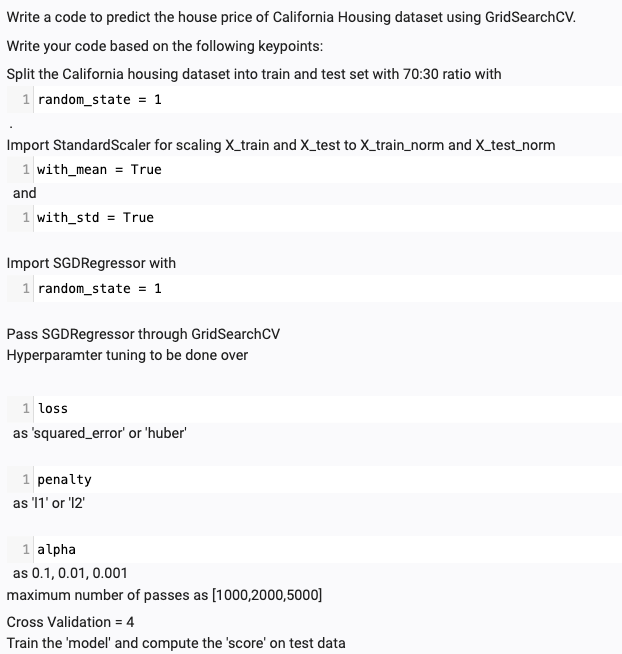

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV


In [75]:
X, y = fetch_california_housing(return_X_y=True)

In [76]:
np.random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, random_state=1)

In [77]:
std_scale = StandardScaler(with_mean=True, with_std=True)


In [78]:
X_train.shape

(14448, 8)

In [79]:
X_train[0]

array([ 2.91480000e+00,  1.50000000e+01,  4.28595745e+00,  1.10553191e+00,
        3.16400000e+03,  2.69276596e+00,  3.41600000e+01, -1.18270000e+02])

In [80]:
X_train_norm = std_scale.fit_transform(X_train)
X_test_norm = std_scale.transform(X_test)

In [81]:
param_grid = {
    'loss': ['squared_error', 'huber'],
    'penalty': ['l1', 'l2'],
    'alpha': [0.1, 0.01, 0.001],
    'max_iter': [1000,2000,5000]
}
sgd = SGDRegressor(random_state=1)
grid_search = GridSearchCV(sgd,
                           param_grid=param_grid, 
                           verbose=1,
                           cv=4)

In [82]:
grid_search.fit(X_train_norm, y_train)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


GridSearchCV(cv=4, estimator=SGDRegressor(random_state=1),
             param_grid={'alpha': [0.1, 0.01, 0.001],
                         'loss': ['squared_error', 'huber'],
                         'max_iter': [1000, 2000, 5000],
                         'penalty': ['l1', 'l2']},
             verbose=1)

In [83]:
grid_search.score(X_test_norm, y_test)

0.5951040704728554

In [84]:
grid_search.best_params_

{'alpha': 0.01, 'loss': 'squared_error', 'max_iter': 1000, 'penalty': 'l1'}

In [85]:
print(grid_search.best_estimator_)

SGDRegressor(alpha=0.01, penalty='l1', random_state=1)


In [86]:
sgd = SGDRegressor(alpha=0.01, penalty='l1', random_state=1)
sgd.fit(X_train_norm, y_train)

sgd.score(X_test_norm, y_test)

0.5951040704728554

## Q5, Q6

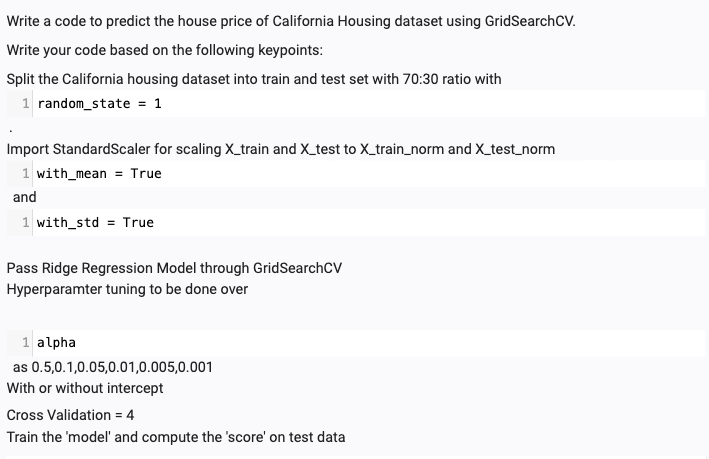

In [87]:
from sklearn.linear_model import Ridge

In [88]:

params = {
    'alpha': [0.5, 0.1, 0.05, 0.01, 0.005, 0.001],
    'fit_intercept': [True, False]
}

ridge_search = GridSearchCV(Ridge(),
                           cv=4,
                           param_grid=params,
                           
                          )

In [89]:
ridge_search.fit(X_train_norm, y_train)


GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': [0.5, 0.1, 0.05, 0.01, 0.005, 0.001],
                         'fit_intercept': [True, False]})

In [90]:
ridge_search.score(X_test_norm, y_test)

0.5971450612248769

In [91]:
ridge_search.best_params_

{'alpha': 0.5, 'fit_intercept': True}

In [92]:
X, y = fetch_california_housing(as_frame=True, return_X_y=True)
np.random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, random_state=1)

In [93]:
std_scale = StandardScaler(with_mean=True, with_std=True)

In [94]:
X_train_norm = std_scale.fit_transform(X_train)
X_test_norm = std_scale.transform(X_test)

In [95]:

params = {
    'fit_intercept': [True, False],
    'alpha': [0.5, 0.1, 0.05, 0.01, 0.005, 0.001]
    
}

ridge_search = GridSearchCV(Ridge(),
                           cv=4,
                           param_grid=params,
                          )



In [96]:
ridge_search.fit(X_train_norm, y_train)
ridge_search.score(X_test_norm, y_test)

0.5971450612248769

In [97]:
ridge_search.best_params_

{'alpha': 0.5, 'fit_intercept': True}

In [98]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=1,
                                                    test_size=0.4,
                                                    train_size=0.6
                                                   )

In [99]:
scale = StandardScaler(with_mean=True, with_std=True)

In [100]:
X_train_norm = scale.fit_transform(X_train)
X_test_norm = scale.transform(X_test)

In [105]:
from sklearn.linear_model import Lasso

params = {
    'alpha': [0.5,0.1,0.05,0.01,0.005,0.001],
    'fit_intercept': [True, False]
}

lasso_search = GridSearchCV(Lasso(),
                            verbose=1,
                            param_grid=params,
                            cv=6,
                           )

In [106]:
lasso_search.fit(X_train_norm, y_train)

Fitting 6 folds for each of 12 candidates, totalling 72 fits


GridSearchCV(cv=6, estimator=Lasso(),
             param_grid={'alpha': [0.5, 0.1, 0.05, 0.01, 0.005, 0.001],
                         'fit_intercept': [True, False]},
             verbose=1)

In [107]:
lasso_search.score(X_test_norm, y_test)

0.6047829320240279

In [108]:
lasso_search.best_params_

{'alpha': 0.005, 'fit_intercept': True}

# WEEK 5

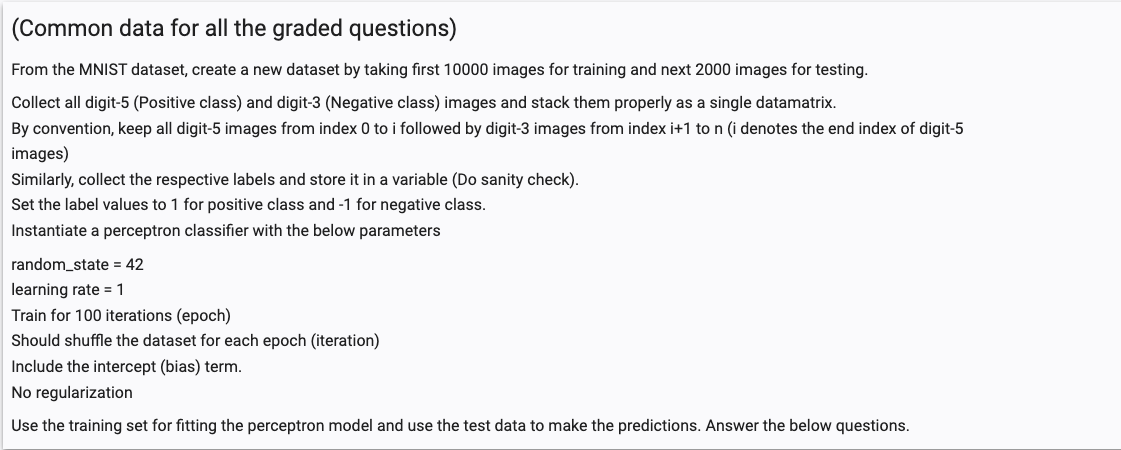

In [63]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, as_frame=True, return_X_y=True, )

/Users/PushpakRuhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [64]:
X.shape

(70000, 784)

In [65]:
X_train, y_train = X[:10000], y[:10000]
X_test, y_test = X[10000:10000+2000], y[10000:10000+2000]

In [66]:
X_train.shape

(10000, 784)

In [67]:
X_test.shape

(2000, 784)

In [69]:
y_train[y_train=='5'].index

Index([   0,   11,   35,   47,   65,  100,  132,  138,  145,  173,
       ...
       9858, 9859, 9898, 9899, 9919, 9945, 9947, 9951, 9958, 9995],
      dtype='int64', length=863)

In [76]:
X_temp = X_train.copy()

In [78]:
X_temp.loc[:,"Test"] = 1

In [98]:
X_train_5 = X_train.iloc[y_train[y_train=='5'].index, :]
X_train_3 = X_train.iloc[y_train[y_train=='3'].index, :]

X_train_5.loc[:,'target'] = 1
X_train_3.loc[:,'target'] = -1

X35_train = pd.concat([X_train_5, X_train_3])

/var/folders/vm/pmp1rbyn7g72543clq9jjhnr0000gn/T/ipykernel_30083/4093409076.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train_5.loc[:,'target'] = 1
/var/folders/vm/pmp1rbyn7g72543clq9jjhnr0000gn/T/ipykernel_30083/4093409076.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_5.loc[:,'target'] = 1
/var/folders/vm/pmp1rbyn7g72543clq9jjhnr0000gn/T/ipykernel_30083/4093409076.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which h

In [101]:
y35_train = pd.concat([X_train_5['target'],X_train_3['target']])

In [81]:
X_train_5.shape

(863, 785)

In [82]:
X_train_3.shape

(1032, 785)

In [ ]:
y35_train

0       1
11      1
35      1
47      1
65      1
       ..
9953   -1
9959   -1
9974   -1
9977   -1
9991   -1
Name: target, Length: 1895, dtype: int64

In [102]:
y35_train.iloc[862]

1

In [84]:
y35_train.iloc[863]

-1

In [85]:
X35_train.drop(['target'], axis=1, inplace=True)

In [86]:
X35_train.shape

(1895, 784)

In [114]:
'''
X_train_5 = X_train.iloc[y_train[y_train=='5'].index, :]
X_train_3 = X_train.iloc[y_train[y_train=='3'].index, :]

X_train_5.loc[:,'target'] = 1
X_train_3.loc[:,'target'] = -1

X35_train = pd.concat([X_train_5, X_train_3])
'''

X_test_5 = X_test.loc[y_test[y_test=='5'].index, :]
X_test_3 = X_test.loc[y_test[y_test=='3'].index, :]

X_test_5.loc[:, 'target'] = 1
X_test_3.loc[:, 'target'] = -1

X35_test = pd.concat([X_test_5, X_test_3])

/var/folders/vm/pmp1rbyn7g72543clq9jjhnr0000gn/T/ipykernel_30083/2502518185.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test_5.loc[:, 'target'] = 1
/var/folders/vm/pmp1rbyn7g72543clq9jjhnr0000gn/T/ipykernel_30083/2502518185.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test_3.loc[:, 'target'] = -1


In [116]:
y35_test = X35_test['target']

In [117]:
y35_test

10008    1
10015    1
10030    1
10035    1
10049    1
        ..
11958   -1
11960   -1
11978   -1
11979   -1
11999   -1
Name: target, Length: 381, dtype: int64

In [130]:
# X35_test.drop('target', axis=1, inplace=True)

In [132]:
# X35_train.drop('target', axis=1, inplace=True)

In [120]:
print(X35_train.head(2))
print(X35_test.head(2))
print(y35_train.head(2))
print(y35_test.head(2))

    pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
11     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

    pixel10  ...  pixel776  pixel777  pixel778  pixel779  pixel780  pixel781  \
0       0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
11      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

    pixel782  pixel783  pixel784  target  
0        0.0       0.0       0.0       1  
11       0.0       0.0       0.0       1  

[2 rows x 785 columns]
       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
10008     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
10015     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
10008      0.0  ...       0.0       0.0       0.0     

## Q1

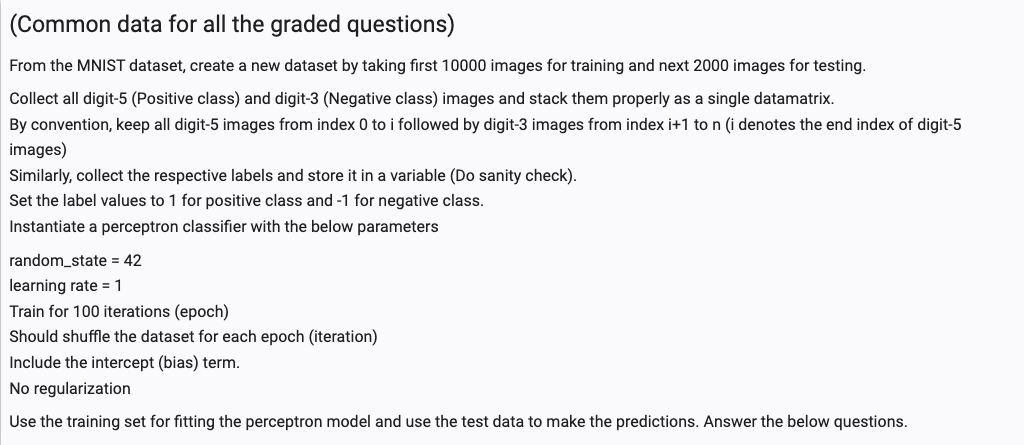

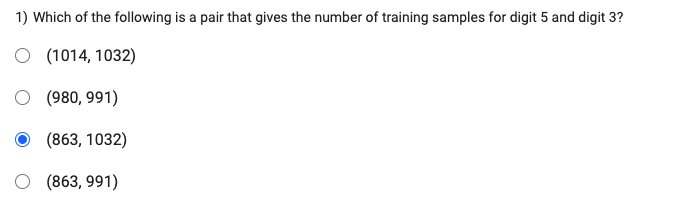

In [121]:
X_train_5.shape

(863, 785)

In [122]:
X_train_3.shape

(1032, 785)

In [125]:
from sklearn.linear_model import Perceptron

perc = Perceptron(random_state=42, 
                  eta0=1, 
                  max_iter=100, 
                  shuffle=True, 
                  fit_intercept=True, 
                  penalty=None
                 )

## Q2

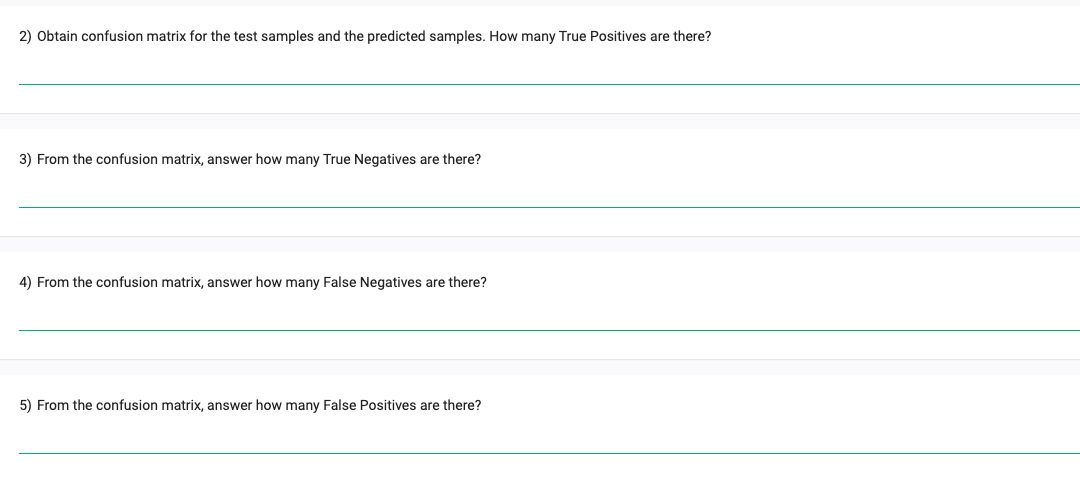

In [ ]:
X35_train

In [133]:
perc.fit(X35_train, y35_train)

Perceptron(eta0=1, max_iter=100, random_state=42)

In [167]:
y35_pred = perc.predict(X35_test)

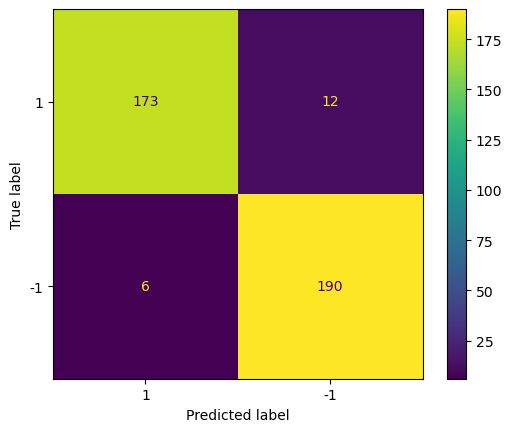

In [176]:
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay)

cm = confusion_matrix(y35_test,y35_pred, labels=[1, -1])

cm_display = ConfusionMatrixDisplay.from_predictions(y35_test, y35_pred, labels=[1,-1])

In [177]:
cm

array([[173,  12],
       [  6, 190]])

In [153]:
tn, fp, fn, tp = cm.ravel()

In [156]:
tp

190

In [157]:
tn

173

In [158]:
fp

12

In [159]:
fn

6

# WEEK 6

In [133]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml

X, y = fetch_openml("mnist_784", return_X_y=True, as_frame=True, parser="auto")

In [134]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=False)

In [135]:
y_train.iloc[-1]

'6'

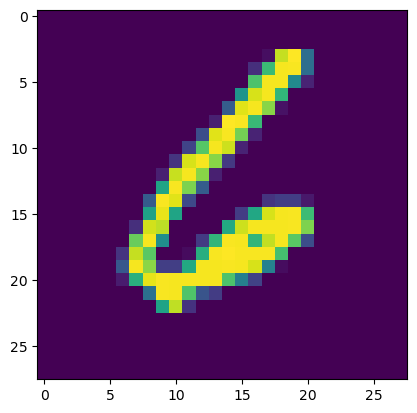

In [136]:
import matplotlib.pyplot as plt

plt.imshow(np.array(X_train.iloc[-1,:]).reshape(28,28))

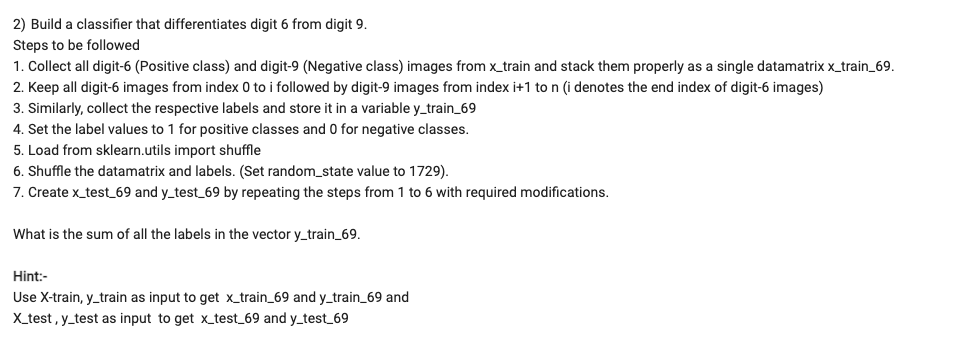

In [137]:
train_data = X_train.copy()

In [138]:
train_data['target'] = y_train.values

In [139]:
train_data['target'] = train_data['target'].astype(int)

In [140]:
def custom_datasets(X_train, y_train ,custom_number, custom_label):
    train_data = X_train.copy()
    train_data['target'] = y_train.values
    train_data['target'] = train_data['target'].astype(int)
    X_train6 = train_data[train_data['target']==custom_number].copy()
    X_train6['target'] = custom_label
    y_train6 = X_train6['target']

    X_train6.drop(['target'], 
                  axis=1, 
                  inplace=True)

    return X_train6, y_train6
    


In [141]:
X_train6 = train_data[train_data['target']==6].copy()
X_train6['target'] = 1
y_train6 = X_train6['target']

X_train6.drop(['target'], 
              axis=1, 
              inplace=True)


In [142]:
X_train9 = train_data[train_data['target']==9].copy()
X_train9['target'] = -1
y_train9 = X_train9['target']

X_train9.drop(['target'], 
              axis=1, 
              inplace=True)


In [143]:
X_train69 = pd.concat([X_train6, X_train9])

In [144]:
y_train69 = pd.concat([y_train6, y_train9])

In [145]:
from sklearn.utils import shuffle

X_train69, y_train69 = shuffle(X_train69, y_train69, random_state=1729)

In [146]:
X_test6, y_test6 = custom_datasets(X_test, y_test, 6, 1)
X_test9, y_test9 = custom_datasets(X_test, y_test, 9, -1)

X_test69 = pd.concat([X_test6, X_test9])
y_test69 = pd.concat([y_test6, y_test9])


## Q- What is the sum of all the labels in the vector y_train_69.


In [147]:
y_train69.sum()

-36

In [148]:
y_test69.sum()

-46

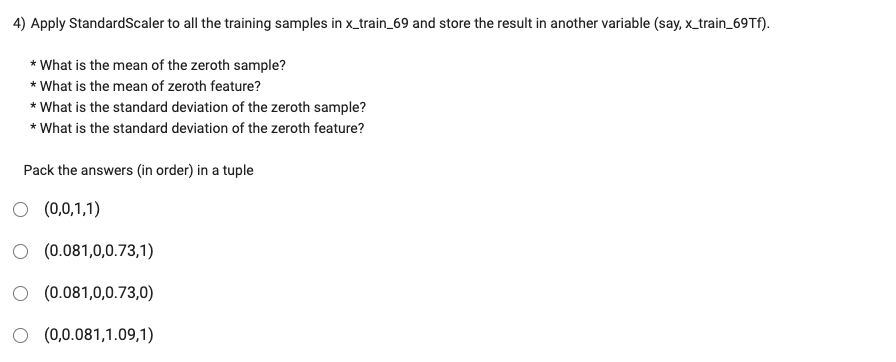

In [149]:
from sklearn.preprocessing import StandardScaler

In [150]:
X_train69_norm = StandardScaler().fit_transform(X_train69)


In [151]:
(X_train69_norm[0,:].mean(), X_train69_norm[:, 0].mean(), X_train69_norm[0,:].std(), X_train69_norm[:, 0].std())

(0.08128379559427992, 0.0, 0.735882322603775, 0.0)

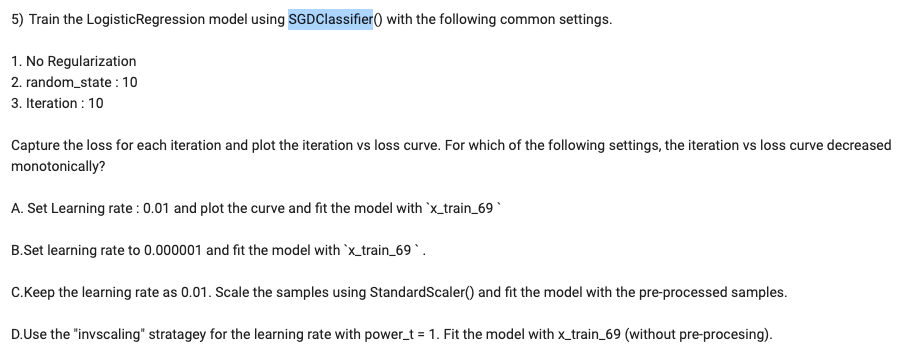

In [191]:
from sklearn.linear_model import SGDClassifier

log_reg = SGDClassifier(loss="log", random_state=10, max_iter=10,
                        learning_rate="constant",
                        eta0=0.01,
                        warm_start=True
                       )

In [192]:
from sklearn.metrics import log_loss
loss = {}
for i in range(log_reg.max_iter):
    log_reg.fit(X_train69_norm, y_train69)
    loss[i] = log_loss(y_pred=log_reg.predict(X_test69), y_true= y_test69)
    

/Users/PushpakRuhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/PushpakRuhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(
/Users/PushpakRuhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/PushpakRuhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(
/Users/PushpakRuhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1

In [193]:
import matplotlib.pyplot as plt

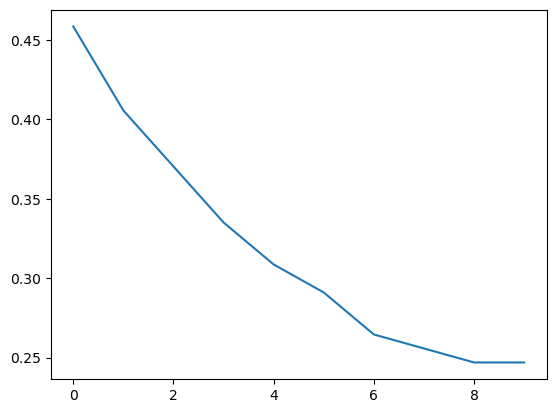

In [184]:
plt.plot(loss.keys(), loss.values())

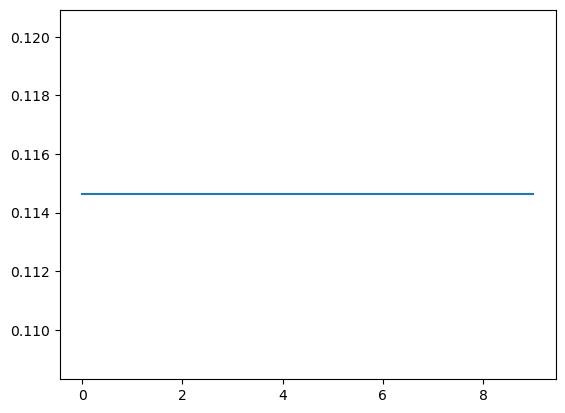

In [187]:
plt.plot(loss.keys(), loss.values())

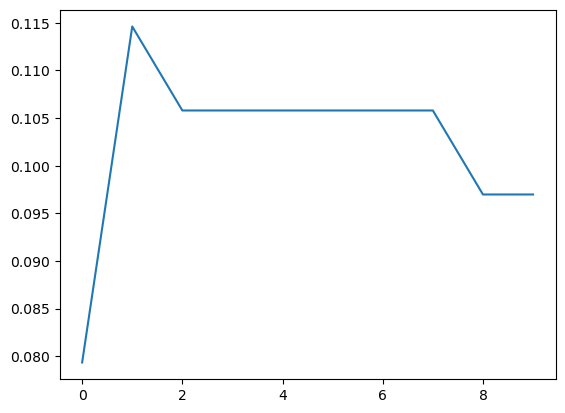

In [190]:
plt.plot(loss.keys(), loss.values())

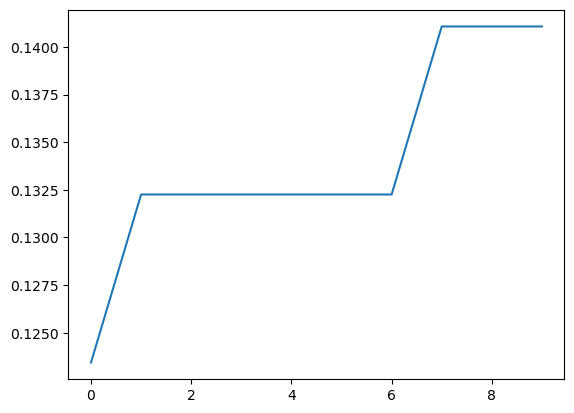

In [194]:
plt.plot(loss.keys(), loss.values())

In [161]:
np.sum(y_train69)

-36

# WEEK 7


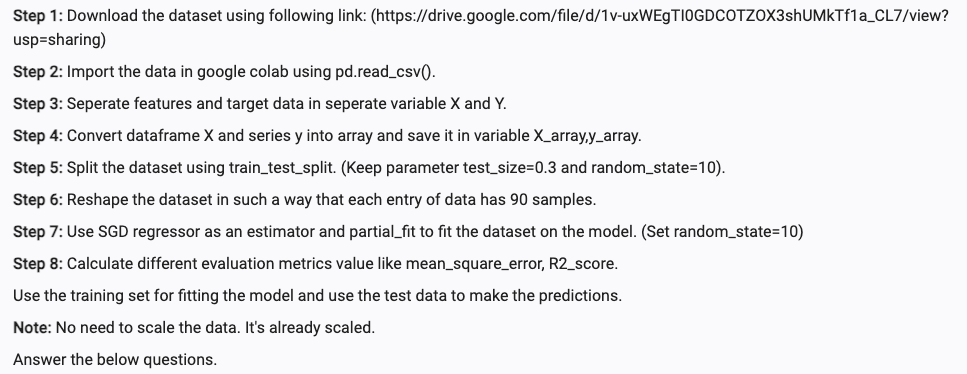

In [1]:
!ls

Graded_Assignments.ipynb w2.1_data.csv            w7a_data.csv
Qz1_revision.ipynb       w2.2_data.csv
mlp PA GA                w2_data.csv


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("w7a_data.csv")

In [7]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [10]:
X_array = np.asarray(X)
y_array = np.asarray(y)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, test_size=0.3, random_state=10)

In [15]:
X_train, X_test = X_train.reshape(-1,90,10), X_test.reshape(-1,90,10)
y_train, y_test = y_train.reshape(-1, 90), y_test.reshape(-1, 90)

In [17]:
y_train.shape

(700, 90)

In [18]:
y_train

array([[ -67.2  ,   35.   ,   35.6  , ...,  211.   ,    0.761,   86.8  ],
       [ 240.   ,  203.   , -221.   , ...,  -98.7  ,  170.   , -319.   ],
       [  27.7  ,   76.4  ,   -0.596, ..., -149.   , -188.   ,   80.4  ],
       ...,
       [ 212.   ,  -86.3  ,  188.   , ..., -244.   ,  -85.4  ,  153.   ],
       [ 232.   ,   23.7  , -364.   , ...,  185.   , -459.   , -374.   ],
       [  -4.08 ,    7.87 ,   -2.83 , ...,  139.   ,  170.   , -157.   ]])

In [20]:
X_train.shape

(700, 90, 10)

In [21]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(random_state=10)

In [28]:
for i in range(X_train.shape[0]):
    X_batch, y_batch = X_train[i], y_train[i]
    sgd.partial_fit(X_batch, y_batch)

In [29]:
sgd.intercept_

array([-0.0054532])

In [30]:
sgd.coef_

array([51.3212522 , 22.26535893, 81.23762868, 53.19615839, 76.46565732,
       71.47204651, 93.45092409, 51.92198178, 30.03910055, 40.95656774])

In [44]:
from sklearn.metrics import r2_score

y_pred = []

for i in range(X_test.shape[0]):
    y_pred.append(sgd.predict(X_test[i]))

In [45]:
r2_score(y_test,y_pred)

0.9999919041690718

In [47]:
##Implement SGD regressor
from sklearn.linear_model import SGDRegressor

regressor = SGDRegressor(random_state=10)
##Selecting data in batches
for i in range(X_train.shape[0]): 
    X_batch, Y_batch = X_train[i], y_train[i]
    ## Partially fitting data in batches
    regressor.partial_fit(X_batch, Y_batch)
    if i==5:
      break
print(regressor.coef_)

[42.09235031 16.08146212 61.689364   40.72435041 61.09763081 58.69302604
 73.34479193 45.7320542  25.70611792 33.33256388]


# WEEK 8

## WEEK 8A

### Q1,2,3

In [1]:
import numpy as np
import sklearn
import pandas as pd

from sklearn.datasets import load_wine
df = load_wine()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.3, random_state = 1)

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


params_dict = {
    "criterion": ["entropy", "gini"],
    "splitter": ["random", "best"],
    "min_samples_leaf": [2,4,6,8,10],
    "max_depth": [3,4,5,6]  
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=1),
                    params_dict,
                    cv=4
                   )

grid.fit(X_train, y_train)



GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'splitter': ['random', 'best']})

In [7]:
grid.score(X_test,y_test)

0.9074074074074074

In [8]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 2,
 'splitter': 'best'}

### Q4,5,6

In [22]:
from sklearn.tree import (DecisionTreeRegressor, plot_tree)
from sklearn.datasets import load_diabetes

df = load_diabetes(as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(
    df.data,
    df.target,
    test_size=0.3,
    random_state=1
)


model = DecisionTreeRegressor(random_state=1,
                               criterion='squared_error',
                               splitter = 'random',
                               max_leaf_nodes = 10
                              )

In [23]:
model.fit(X_train, y_train)
print("Training score: ", model.score(X_train, y_train))
print("Testing score: ", model.score(X_test, y_test))

Training score:  0.5032060624566737
Testing score:  0.218771375137222


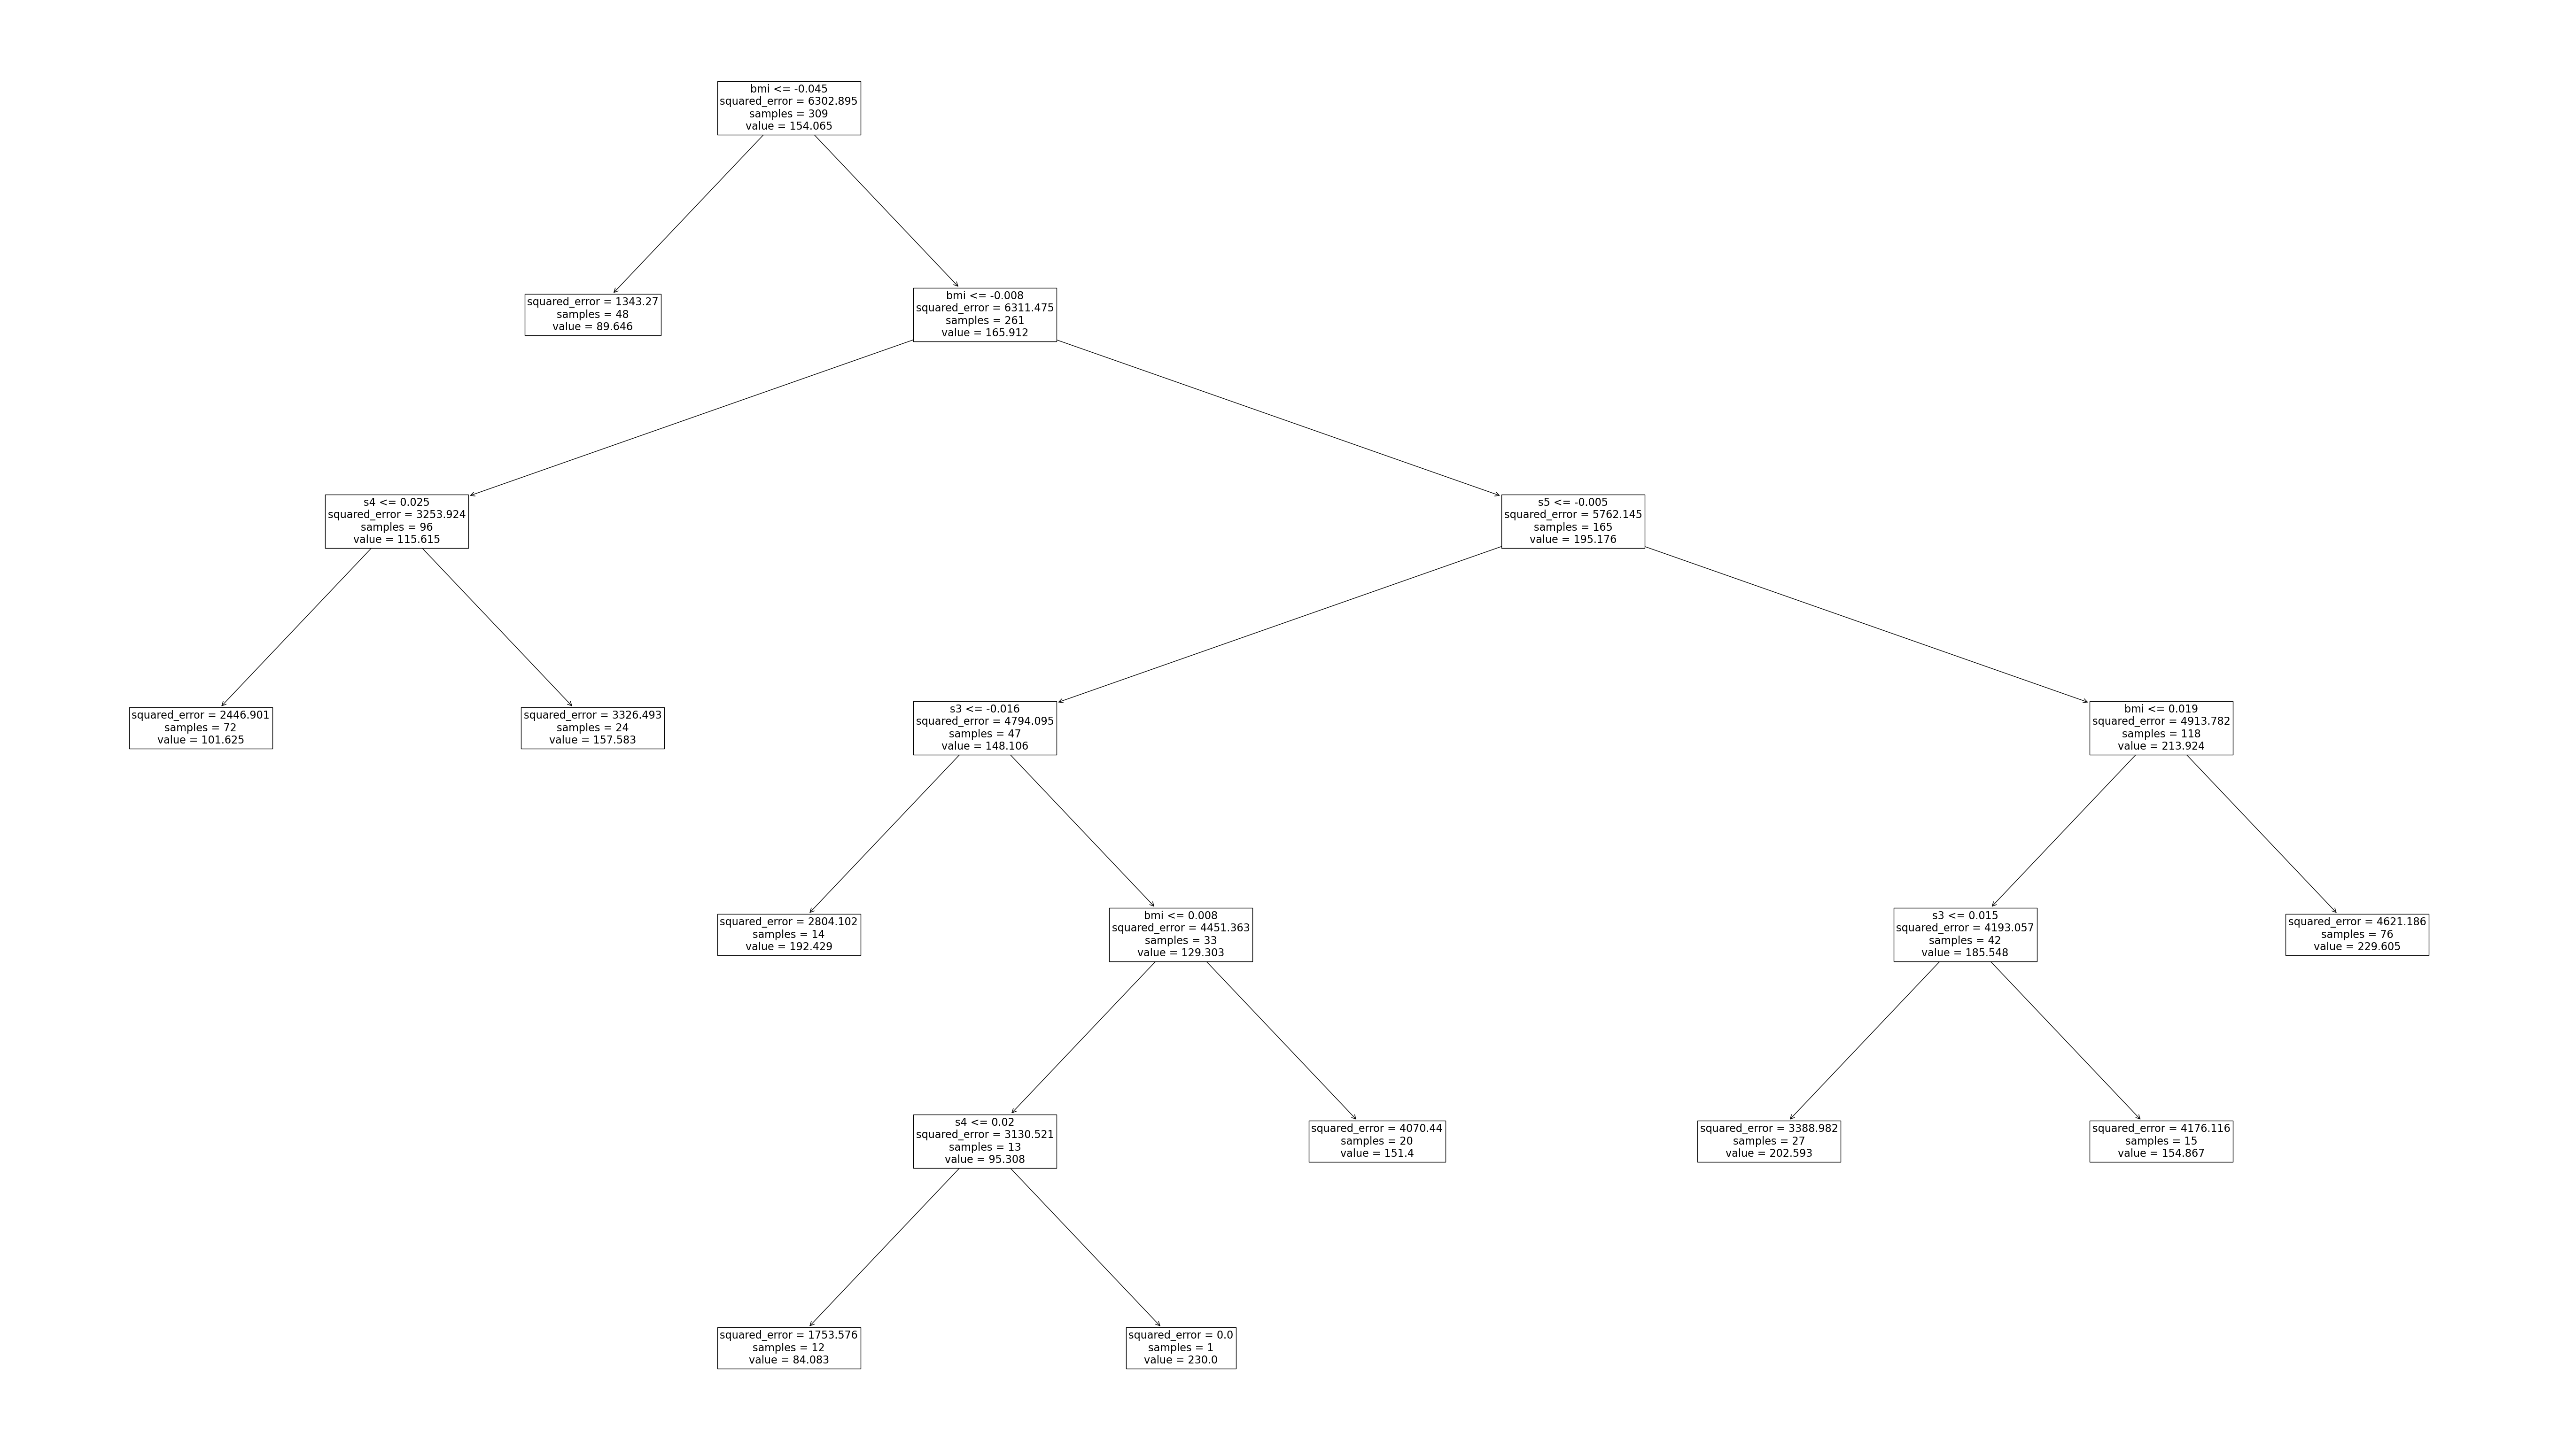

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(70,40), facecolor='w')
fig = plot_tree(model,feature_names=X_train.columns, fontsize=16)


### Q8,9,10

In [38]:
model = DecisionTreeRegressor(random_state=1, max_depth=4)

params_dict = {
    "criterion": ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    "splitter": ['random', 'best'],
    "max_features": [4,5,6, 'sqrt', 'log2'],
    "ccp_alpha": [0.001,0.01,0.02,0.05]
}

grid = GridSearchCV(model, 
                    params_dict, 
                    cv=4, 
                    return_train_score=True)


In [39]:
grid.fit(X_train, y_train)


GridSearchCV(cv=4, estimator=DecisionTreeRegressor(max_depth=4, random_state=1),
             param_grid={'ccp_alpha': [0.001, 0.01, 0.02, 0.05],
                         'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_features': [4, 5, 6, 'sqrt', 'log2'],
                         'splitter': ['random', 'best']},
             return_train_score=True)

In [40]:
grid.score(X_test, y_test)

0.2276927113007854

In [41]:
grid.best_params_

{'ccp_alpha': 0.001,
 'criterion': 'squared_error',
 'max_features': 5,
 'splitter': 'random'}